# ROSE

# 1. Read the data as an appropriate Time Series data and plot the data.


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels
import statsmodels.tools.eval_measures as      em
import sklearn
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from warnings import filterwarnings
filterwarnings("ignore")
from    pandas                   import   read_csv, Grouper, DataFrame, concat
from    datetime                 import   datetime

In [27]:
dfr = pd.read_csv("Rose.csv")

In [28]:
dfr.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [29]:
dfr_missing_value= dfr.isnull().sum()
dfr_missing_value

YearMonth    0
Rose         2
dtype: int64

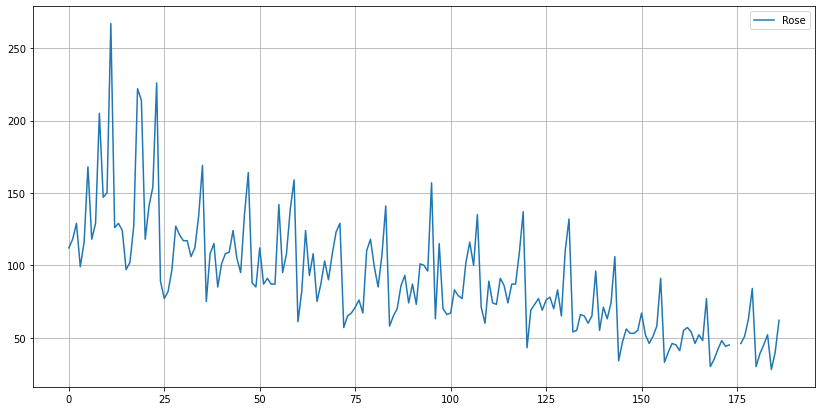

In [30]:
dfr.plot();
plt.grid()

In [31]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [32]:
dfr['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
dfr.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [33]:
dfr.set_index(keys='Time_Stamp',drop=True,inplace=True)
dfr.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [34]:
dfr.drop(labels=['YearMonth'],axis=1,inplace=True)
dfr.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [35]:
dfr.interpolate(method = 'pad')['1994'].tail()


,Rose
Time_Stamp,
1994-08-31,45.0
1994-09-30,46.0
1994-10-31,51.0
1994-11-30,63.0
1994-12-31,84.0


In [36]:
dfr['1994'].tail(-1)

,Rose
Time_Stamp,
1994-02-28,35.0
1994-03-31,42.0
1994-04-30,48.0
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,NaN
1994-08-31,NaN
1994-09-30,46.0
1994-10-31,51.0


In [42]:
dfr.interpolate()['1994'].tail(-1)

,Rose
Time_Stamp,
1994-02-28,35.000000
1994-03-31,42.000000
1994-04-30,48.000000
1994-05-31,44.000000
1994-06-30,45.000000
1994-07-31,45.333333
1994-08-31,45.666667
1994-09-30,46.000000
1994-10-31,51.000000


In [43]:
 dfr.isnull().sum()

Rose    0
dtype: int64

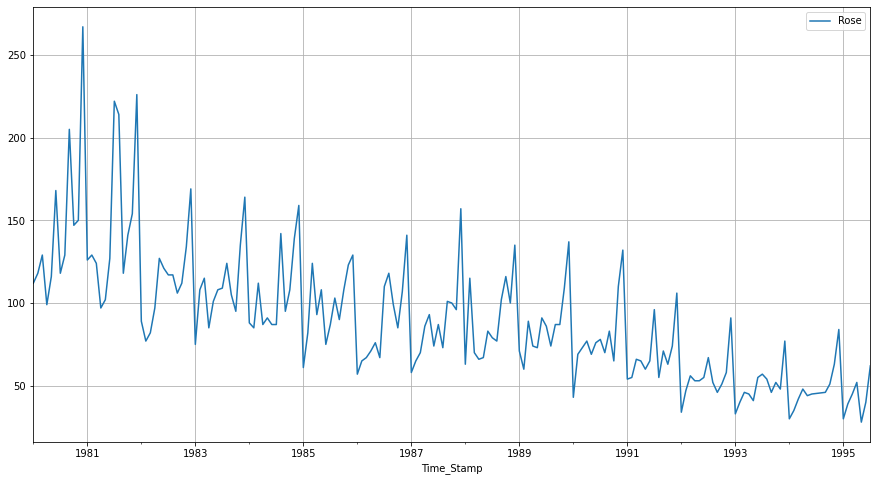

In [44]:
from pylab import rcParams


rcParams['figure.figsize'] = 15,8

dfr.plot()
plt.grid();

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [45]:
dups = dfr.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

dfr[dups]

Number of duplicate rows = 89


,Rose
Time_Stamp,
1980-07-31,118.0
1980-08-31,129.0
1981-02-28,129.0
1981-09-30,118.0
1982-04-30,97.0
...,...
1994-11-30,63.0
1995-01-31,30.0
1995-03-31,45.0


In [46]:
dfr.isnull().sum()

Rose    0
dtype: int64

In [47]:
dfr.describe()


,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [48]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [49]:
dfr.shape

(187, 1)

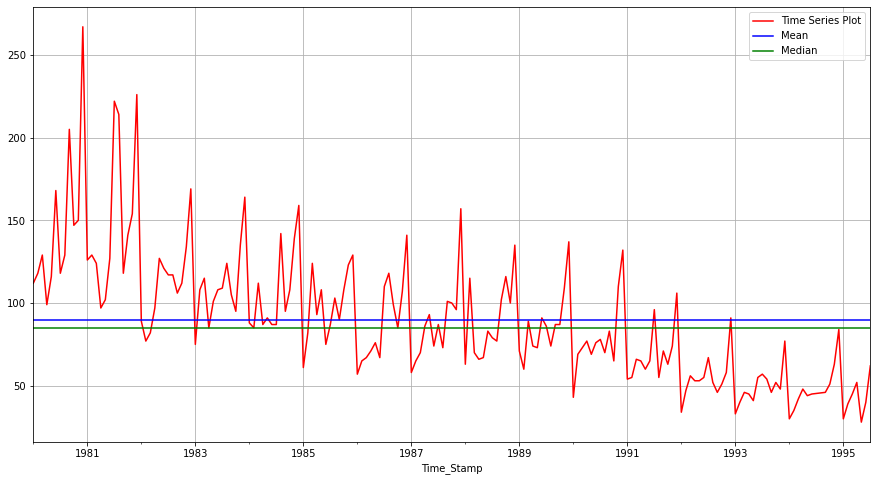

In [50]:
dfr.plot(color='red')
plt.axhline(dfr['Rose'].mean(),color='Blue')
plt.axhline(dfr['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


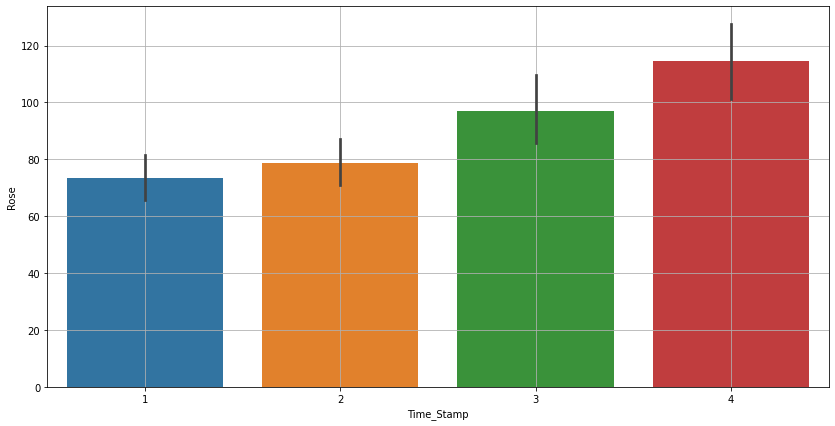

In [117]:
sns.barplot(dfr.index.quarter, dfr.Rose,data=dfr)
plt.grid();


In [118]:
dfr.index.month_name


<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Time_Stamp', length=187, freq=None)>

In [119]:
quarterly_sales_across_years = pd.pivot_table(dfr, values = 'Rose', columns = dfr.index.month_name(), index = dfr.index.year)
quarterly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


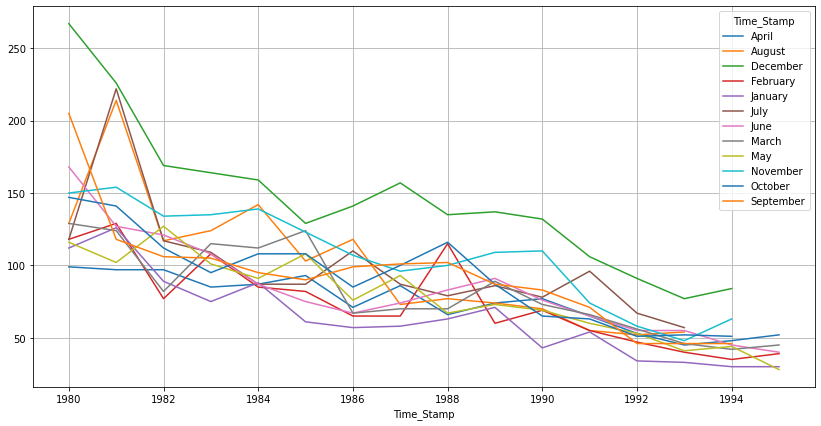

In [120]:
quarterly_sales_across_years.plot()
plt.grid()

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

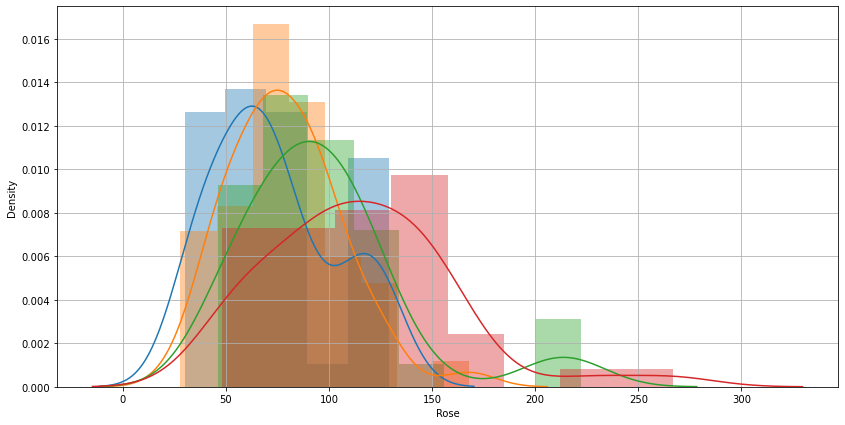

In [121]:
sns.distplot(dfr.loc[dfr.index.quarter == 1]['Rose'])
sns.distplot(dfr.loc[dfr.index.quarter == 2]['Rose'])
sns.distplot(dfr.loc[dfr.index.quarter == 3]['Rose'])
sns.distplot(dfr.loc[dfr.index.quarter == 4]['Rose'])
plt.grid();

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

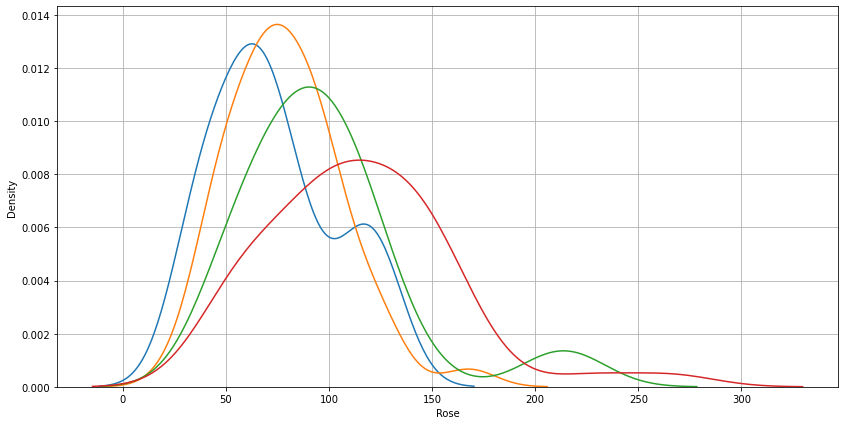

In [122]:
sns.distplot(dfr.loc[dfr.index.quarter == 1]['Rose'],hist=False)
sns.distplot(dfr.loc[dfr.index.quarter == 2]['Rose'],hist=False)
sns.distplot(dfr.loc[dfr.index.quarter == 3]['Rose'],hist=False)
sns.distplot(dfr.loc[dfr.index.quarter == 4]['Rose'],hist=False)
plt.grid();

In [18]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

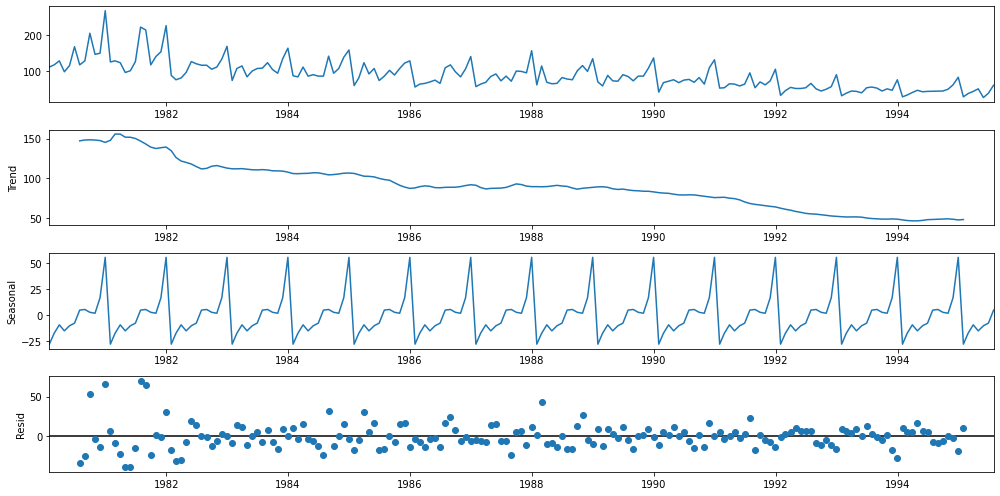

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(dfr,model='additive')
decomposition.plot();

In [20]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [21]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
                ...    
1995-03-31    -9.285830
1995-04-30   -15.098330
1995-05-31   -10.196544
1995-06-30    -7.678687
1995-07-31     4.896908
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



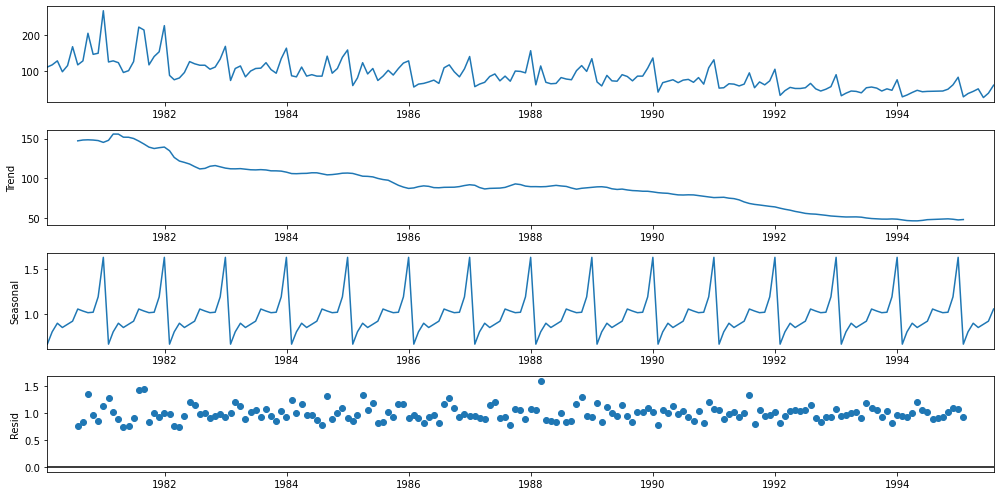

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(dfr,model='multiplicative')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [24]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
                ...   
1995-03-31    0.901164
1995-04-30    0.854024
1995-05-31    0.889415
1995-06-30    0.923985
1995-07-31    1.058038
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



# 3. Split the data into training and test. The test data should start in 1991.


In [52]:
train             = dfr[dfr.index<'1991'] 
test              = dfr[dfr.index>'1991']

In [53]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [54]:
# Printing the Rose Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0
...,...
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0


Test Data


,Rose
Time_Stamp,
1991-01-31,54.000000
1991-02-28,55.000000
1991-03-31,66.000000
1991-04-30,65.000000
1991-05-31,60.000000
1991-06-30,65.000000
1991-07-31,96.000000
1991-08-31,55.000000
1991-09-30,71.000000



# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.


In [55]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [56]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [57]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874982660106467,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38704806164168,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [59]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    87.104997
1991-02-28    87.104997
1991-03-31    87.104997
1991-04-30    87.104997
1991-05-31    87.104997
1991-06-30    87.104997
1991-07-31    87.104997
1991-08-31    87.104997
1991-09-30    87.104997
1991-10-31    87.104997
1991-11-30    87.104997
1991-12-31    87.104997
1992-01-31    87.104997
1992-02-29    87.104997
1992-03-31    87.104997
1992-04-30    87.104997
1992-05-31    87.104997
1992-06-30    87.104997
1992-07-31    87.104997
1992-08-31    87.104997
1992-09-30    87.104997
1992-10-31    87.104997
1992-11-30    87.104997
1992-12-31    87.104997
1993-01-31    87.104997
1993-02-28    87.104997
1993-03-31    87.104997
1993-04-30    87.104997
1993-05-31    87.104997
1993-06-30    87.104997
1993-07-31    87.104997
1993-08-31    87.104997
1993-09-30    87.104997
1993-10-31    87.104997
1993-11-30    87.104997
1993-12-31    87.104997
1994-01-31    87.104997
1994-02-28    87.104997
1994-03-31    87.104997
1994-04-30    87.104997
1994-05-31    87.104997
1994-06-30    87

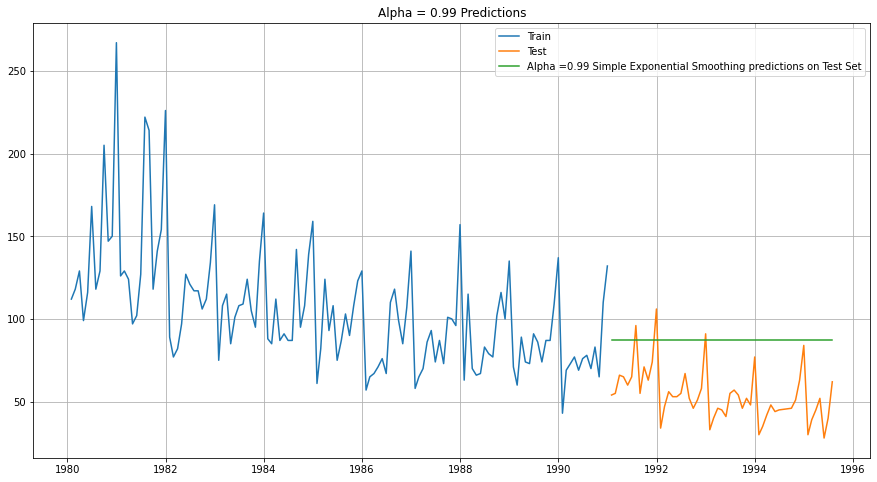

In [60]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [61]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [62]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [63]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 36.79624028783191
SES RMSE (calculated using statsmodels): 36.7962402878319


In [64]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.79624


In [66]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model

# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_DES = model_DES.fit(optimized=True)

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.005627395225399259, 'smoothing_trend': 6.722744943479034e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.53777460719618, 'initial_trend': -0.4905093549686182, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [67]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    72.357791
1991-02-28    71.867286
1991-03-31    71.376780
1991-04-30    70.886275
1991-05-31    70.395769
1991-06-30    69.905264
1991-07-31    69.414758
1991-08-31    68.924253
1991-09-30    68.433748
1991-10-31    67.943242
1991-11-30    67.452737
1991-12-31    66.962231
1992-01-31    66.471726
1992-02-29    65.981220
1992-03-31    65.490715
1992-04-30    65.000209
1992-05-31    64.509704
1992-06-30    64.019199
1992-07-31    63.528693
1992-08-31    63.038188
1992-09-30    62.547682
1992-10-31    62.057177
1992-11-30    61.566671
1992-12-31    61.076166
1993-01-31    60.585661
1993-02-28    60.095155
1993-03-31    59.604650
1993-04-30    59.114144
1993-05-31    58.623639
1993-06-30    58.133133
1993-07-31    57.642628
1993-08-31    57.152122
1993-09-30    56.661617
1993-10-31    56.171112
1993-11-30    55.680606
1993-12-31    55.190101
1994-01-31    54.699595
1994-02-28    54.209090
1994-03-31    53.718584
1994-04-30    53.228079
1994-05-31    52.737574
1994-06-30    52

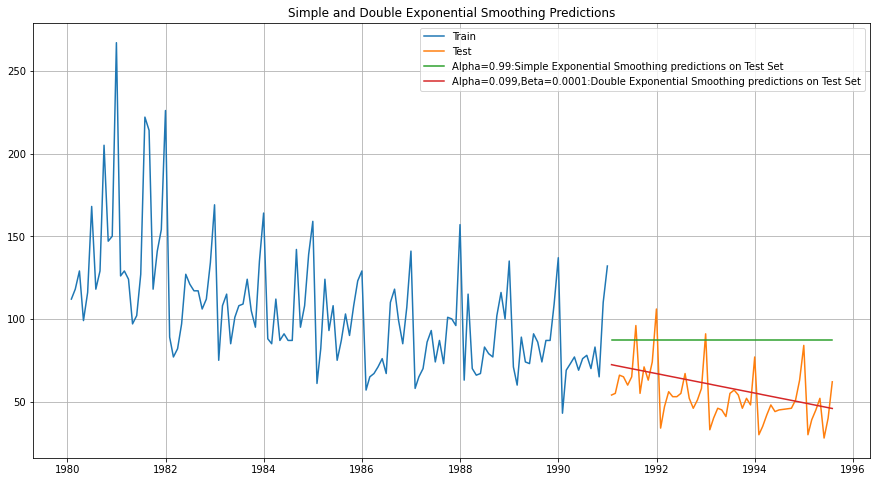

In [68]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [69]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.394980179637058


In [70]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.79624
"Alpha=1,Beta=0.0189:DES",15.39498


In [71]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit(optimized=True)

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09247995167383646, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 147.1251209143706, 'initial_trend': -0.5503329642408892, 'initial_seasons': array([-31.99085126, -19.51359677, -11.31406667, -21.57574971,
       -12.21264592,  -6.5948571 ,   3.15000859,   8.96777153,
         4.77567092,   3.09390942,  21.52051931,  63.56076615]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [72]:
 #Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31     41.703704
1991-02-28     53.630626
1991-03-31     61.279823
1991-04-30     50.467807
1991-05-31     59.280578
1991-06-30     64.348034
1991-07-31     73.542566
1991-08-31     78.809996
1991-09-30     74.067563
1991-10-31     71.835468
1991-11-30     89.711745
1991-12-31    131.201659
1992-01-31     35.099709
1992-02-29     47.026630
1992-03-31     54.675827
1992-04-30     43.863811
1992-05-31     52.676582
1992-06-30     57.744038
1992-07-31     66.938571
1992-08-31     72.206001
1992-09-30     67.463567
1992-10-31     65.231473
1992-11-30     83.107750
1992-12-31    124.597664
1993-01-31     28.495713
1993-02-28     40.422635
1993-03-31     48.071832
1993-04-30     37.259816
1993-05-31     46.072587
1993-06-30     51.140043
1993-07-31     60.334575
1993-08-31     65.602005
1993-09-30     60.859572
1993-10-31     58.627477
1993-11-30     76.503754
1993-12-31    117.993668
1994-01-31     21.891718
1994-02-28     33.818639
1994-03-31     41.467836
1994-04-30     30.655820


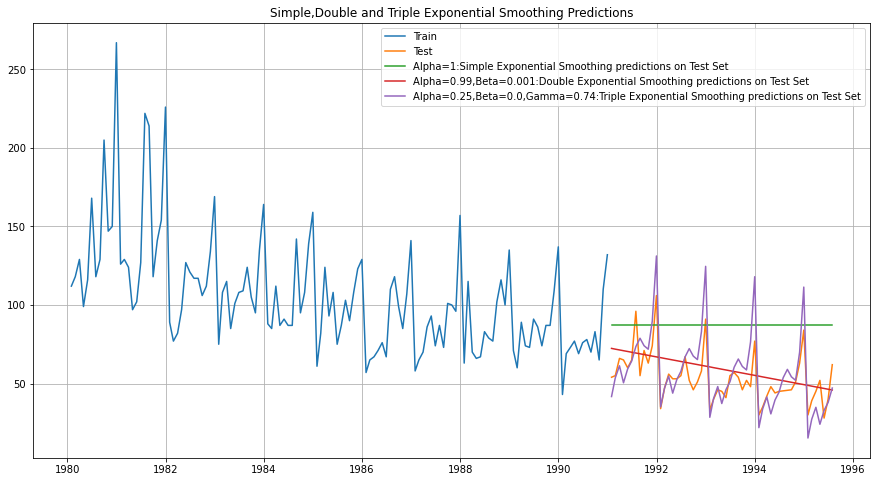

In [73]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [74]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 14.380700451545025


In [75]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.79624
"Alpha=1,Beta=0.0189:DES",15.39498
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",14.38070


In [76]:
#Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07336915185646381, 'smoothing_trend': 0.04366616789722176, 'smoothing_seasonal': 8.092476708185191e-05, 'damping_trend': nan, 'initial_level': 142.12276158556045, 'initial_trend': -0.8409491641808673, 'initial_seasons': array([0.79010014, 0.89594527, 0.9795284 , 0.85607407, 0.9627955 ,
       1.04820922, 1.15284393, 1.22759891, 1.16104173, 1.13748454,
       1.32592572, 1.82801267]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [77]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31     56.217768
1991-02-28     63.543963
1991-03-31     69.244346
1991-04-30     60.320222
1991-05-31     67.614328
1991-06-30     73.366320
1991-07-31     80.423166
1991-08-31     85.352578
1991-09-30     80.458459
1991-10-31     78.562716
1991-11-30     91.271164
1991-12-31    125.404001
1992-01-31     54.018911
1992-02-29     61.050428
1992-03-31     66.518207
1992-04-30     57.937607
1992-05-31     64.934779
1992-06-30     70.449187
1992-07-31     77.214813
1992-08-31     81.936217
1992-09-30     77.227214
1992-10-31     75.397011
1992-11-30     87.580977
1992-12-31    120.316648
1993-01-31     51.820054
1993-02-28     58.556892
1993-03-31     63.792067
1993-04-30     55.554991
1993-05-31     62.255231
1993-06-30     67.532053
1993-07-31     74.006461
1993-08-31     78.519856
1993-09-30     73.995970
1993-10-31     72.231305
1993-11-30     83.890790
1993-12-31    115.229294
1994-01-31     49.621196
1994-02-28     56.063356
1994-03-31     61.065927
1994-04-30     53.172376


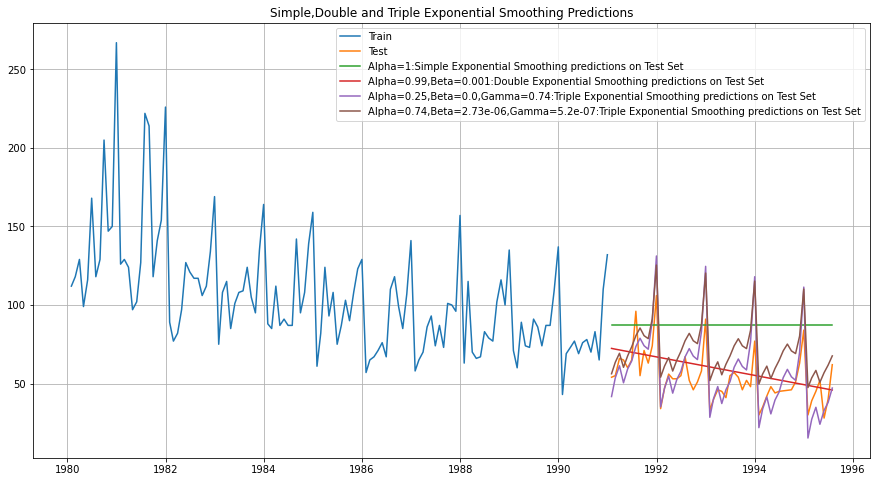

In [78]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [79]:
### Report model accuracy

In [80]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 19.867427460977897


In [81]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.796240
"Alpha=1,Beta=0.0189:DES",15.394980
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",14.380700
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",19.867427


In [82]:
## Model 1: Linear Regression

In [83]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)


Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


In [84]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [85]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
Time_Stamp,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


Last few rows of Training Data


,Rose,time
Time_Stamp,,
1990-08-31,70.0,128
1990-09-30,83.0,129
1990-10-31,65.0,130
1990-11-30,110.0,131
1990-12-31,132.0,132


First few rows of Test Data


,Rose,time
Time_Stamp,,
1991-01-31,54.0,256
1991-02-28,55.0,257
1991-03-31,66.0,258
1991-04-30,65.0,259
1991-05-31,60.0,260


Last few rows of Test Data


,Rose,time
Time_Stamp,,
1995-03-31,45.0,306
1995-04-30,52.0,307
1995-05-31,28.0,308
1995-06-30,40.0,309
1995-07-31,62.0,310


In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr = LinearRegression()

In [89]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

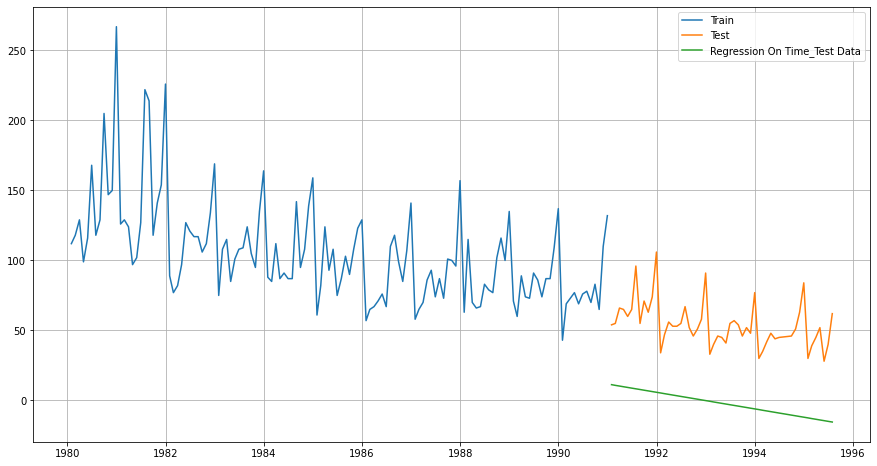

In [91]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [92]:
from sklearn import metrics


In [94]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 57.790 


In [95]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,57.790054


In [96]:
## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [97]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [98]:
train.tail()

,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [100]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

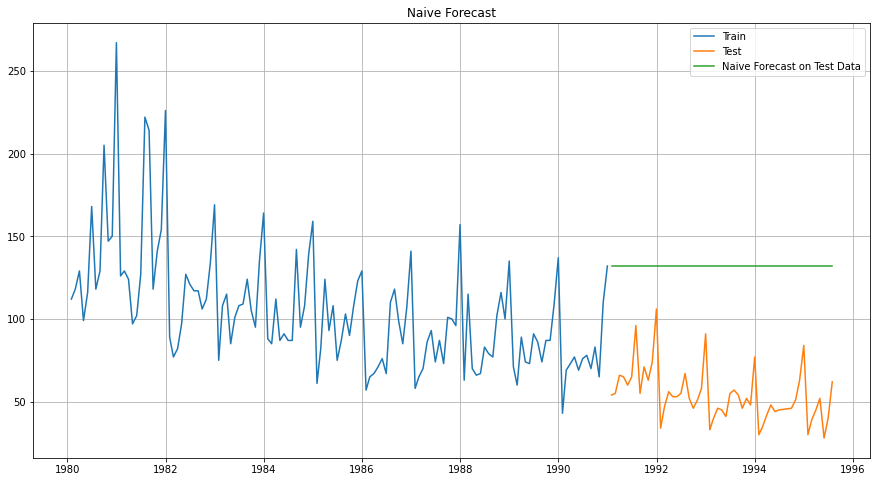

In [101]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [102]:
### Model Evaluation

In [104]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [105]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,57.790054
NaiveModel,79.718773


In [106]:
## Method 3: Simple Average

In [107]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [108]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


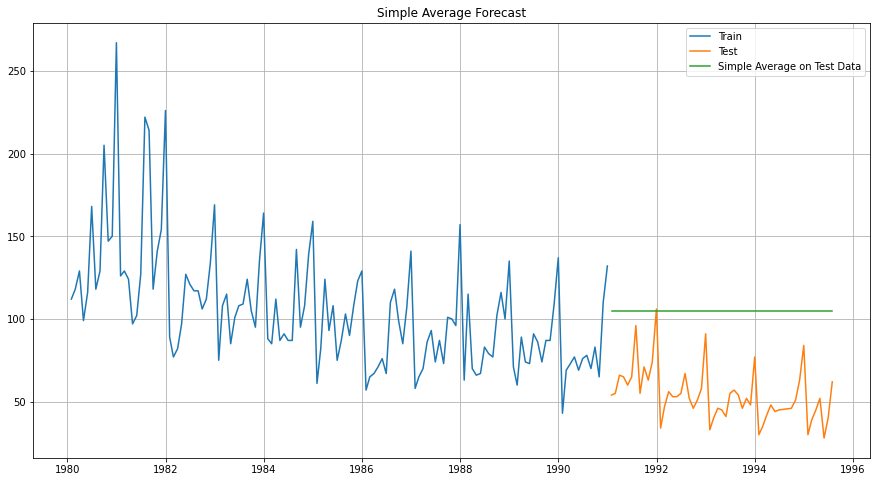

In [109]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [110]:
### Model Evaluation

In [111]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [112]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,57.790054
NaiveModel,79.718773
SimpleAverageModel,53.460570


# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.


In [113]:
## Check for stationarity of the whole Time Series data.

In [114]:
from statsmodels.tsa.stattools import adfuller

In [115]:
dftest = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.240
DF test p-value is 0.4671371627793157
Number of lags used 13


In [116]:
dftest = adfuller(dfr.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.162
DF test p-value is 3.015976115826749e-11
Number of lags used 12


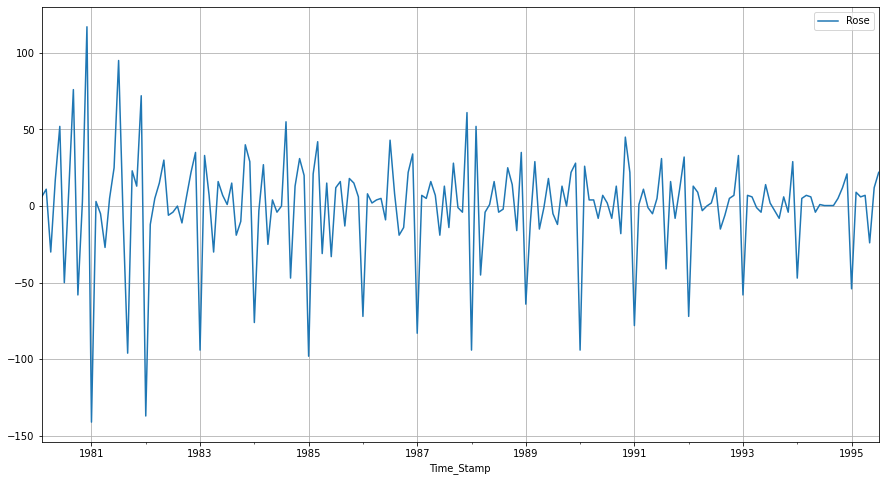

In [117]:
dfr.diff().dropna().plot(grid=True);

In [118]:
## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [119]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

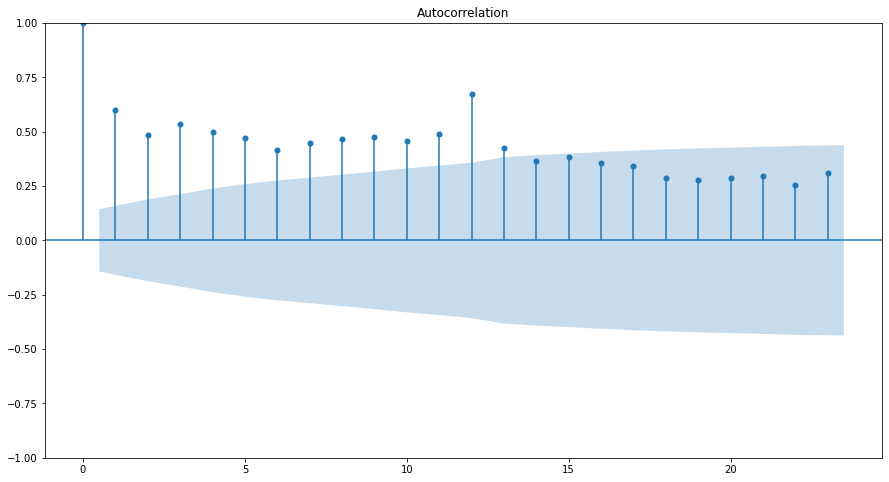

In [120]:
plot_acf(dfr,alpha=0.05);

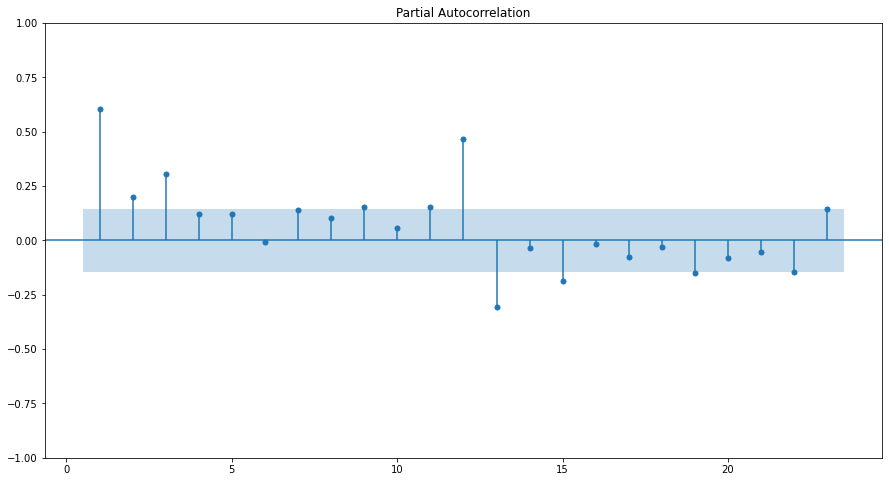

In [121]:
plot_pacf(dfr,zero=False,alpha=0.05);

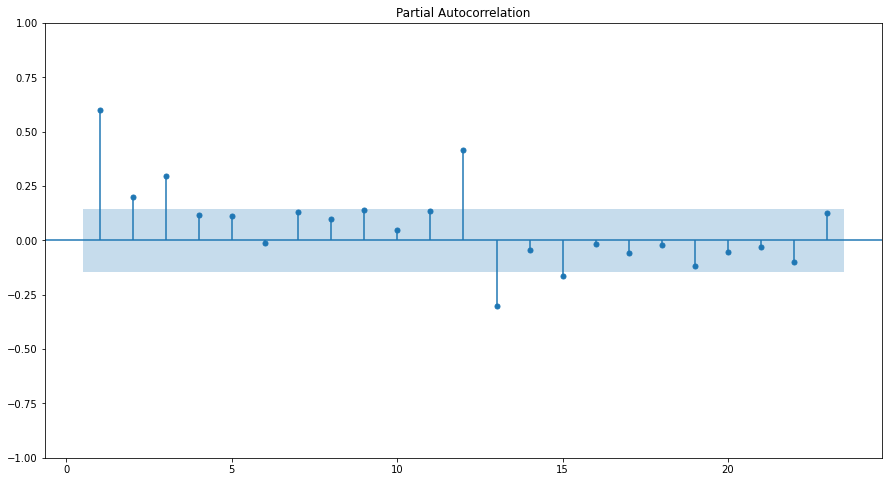

In [122]:
plot_pacf(dfr,zero=False,alpha=0.05,method='ywmle');

In [124]:
dfr.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='Time_Stamp')

In [125]:
train = dfr[dfr.index<='1991'] 
test = dfr[dfr.index>'1991']

In [126]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [127]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [128]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [129]:
## Check for stationarity of the Training Data Time Series.

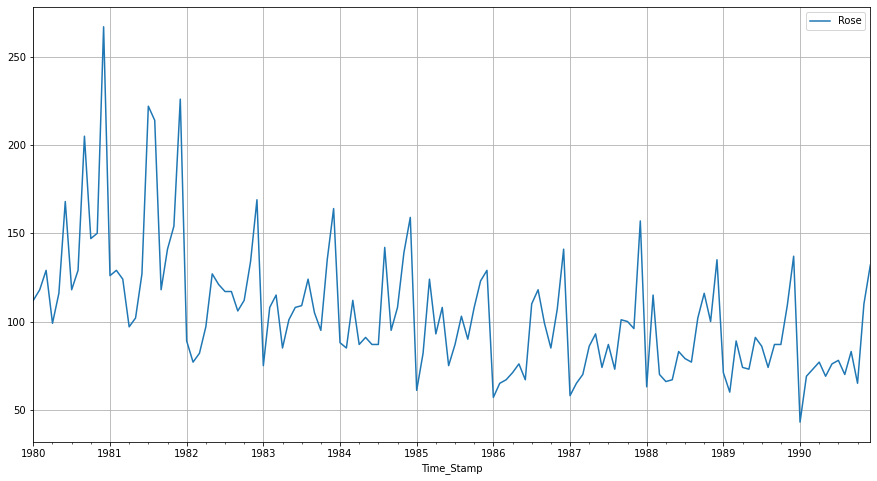

In [130]:
train.plot(grid=True);

In [131]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047051
Number of lags used 13


In [132]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.8948313567833765e-08
Number of lags used 12


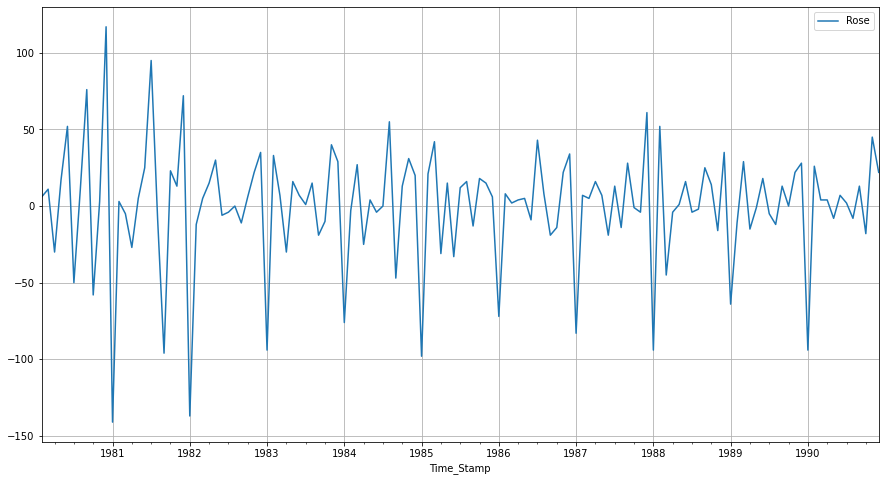

In [133]:
train.diff().dropna().plot(grid=True);

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.


In [135]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [136]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [137]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535788
ARIMA(0, 1, 3) - AIC:1280.5453761734666
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.574229538006
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(1, 1, 3) - AIC:1281.8707223309993
ARIMA(2, 1, 0) - AIC:1298.6110341604924
ARIMA(2, 1, 1) - AIC:1281.5078621868527
ARIMA(2, 1, 2) - AIC:1281.8707222264738
ARIMA(2, 1, 3) - AIC:1274.6948366226698
ARIMA(3, 1, 0) - AIC:1297.4810917271693
ARIMA(3, 1, 1) - AIC:1282.4192776271962
ARIMA(3, 1, 2) - AIC:1283.720740597714
ARIMA(3, 1, 3) - AIC:1278.673067983039


In [138]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.694837
15,"(3, 1, 3)",1278.673068
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [139]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Sun, 27 Nov 2022   AIC                           1274.695
Time:                        10:09:13   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.037      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.701      0.000      -0.893      -0.565
ma.L1          1.0447      0.665      1.572      0.1

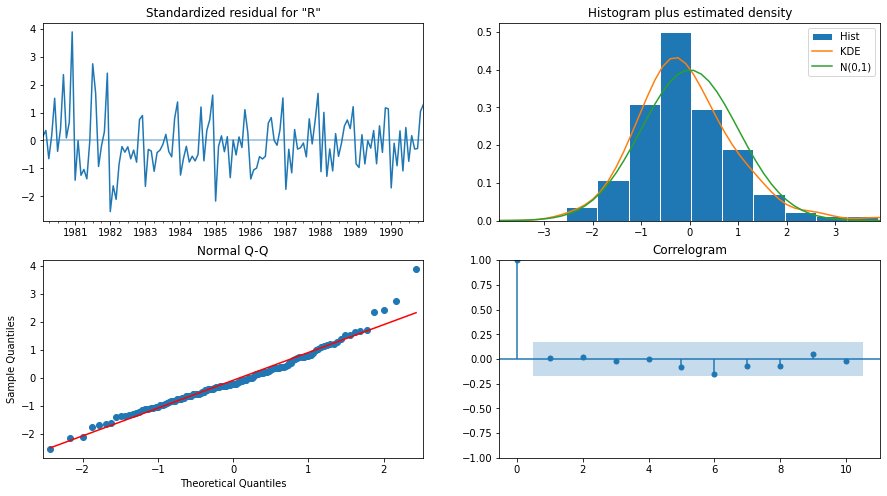

In [140]:
results_auto_ARIMA.plot_diagnostics();

In [141]:
## Predict on the Test Set using this model and evaluate the model.

In [142]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [143]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [144]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.81246514792361 
MAPE: 75.83765356015655


In [145]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",36.812465,75.837654


In [146]:
#SARIMA

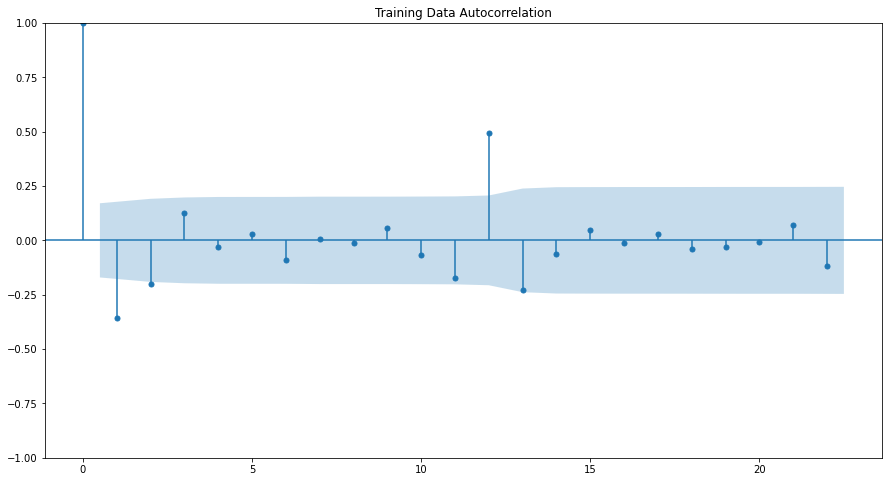

In [147]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [148]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 5)
Model: (0, 1, 2)(0, 0, 2, 5)
Model: (1, 1, 0)(1, 0, 0, 5)
Model: (1, 1, 1)(1, 0, 1, 5)
Model: (1, 1, 2)(1, 0, 2, 5)
Model: (2, 1, 0)(2, 0, 0, 5)
Model: (2, 1, 1)(2, 0, 1, 5)
Model: (2, 1, 2)(2, 0, 2, 5)


In [149]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [152]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 5) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 5) - AIC:1275.5490752912817
SARIMA(0, 1, 0)x(0, 0, 2, 5) - AIC:1213.5302040254257
SARIMA(0, 1, 0)x(1, 0, 0, 5) - AIC:1286.556229448531
SARIMA(0, 1, 0)x(1, 0, 1, 5) - AIC:1269.3209840944269
SARIMA(0, 1, 0)x(1, 0, 2, 5) - AIC:1212.04240216459
SARIMA(0, 1, 0)x(2, 0, 0, 5) - AIC:1234.1826355186704
SARIMA(0, 1, 0)x(2, 0, 1, 5) - AIC:1225.1362733224614
SARIMA(0, 1, 0)x(2, 0, 2, 5) - AIC:1207.4705631597685
SARIMA(0, 1, 1)x(0, 0, 0, 5) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 5) - AIC:1216.756012801237
SARIMA(0, 1, 1)x(0, 0, 2, 5) - AIC:1158.7061041210004
SARIMA(0, 1, 1)x(1, 0, 0, 5) - AIC:1234.4689918746149
SARIMA(0, 1, 1)x(1, 0, 1, 5) - AIC:1210.2642830301459
SARIMA(0, 1, 1)x(1, 0, 2, 5) - AIC:1149.3268460262923
SARIMA(0, 1, 1)x(2, 0, 0, 5) - AIC:1187.3901580242295
SARIMA(0, 1, 1)x(2, 0, 1, 5) - AIC:1173.6582141053404
SARIMA(0, 1, 1)x(2, 0, 2, 5) - AIC:1149.2687057005332
SARIMA(0, 1, 2)x(0, 0, 0, 5) - A

In [153]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
80,"(2, 1, 2)","(2, 0, 2, 5)",1132.421381
26,"(0, 1, 2)","(2, 0, 2, 5)",1134.372547
53,"(1, 1, 2)","(2, 0, 2, 5)",1134.464636
23,"(0, 1, 2)","(1, 0, 2, 5)",1136.146037
20,"(0, 1, 2)","(0, 0, 2, 5)",1137.212194


In [154]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 5)   Log Likelihood                -557.211
Date:                           Sun, 27 Nov 2022   AIC                           1132.421
Time:                                   10:12:59   BIC                           1157.358
Sample:                               01-31-1980   HQIC                          1142.546
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7139      0.088     -8.139      0.000      -0.886      -0.542
ar.L2          0.2680      0.091      2.933

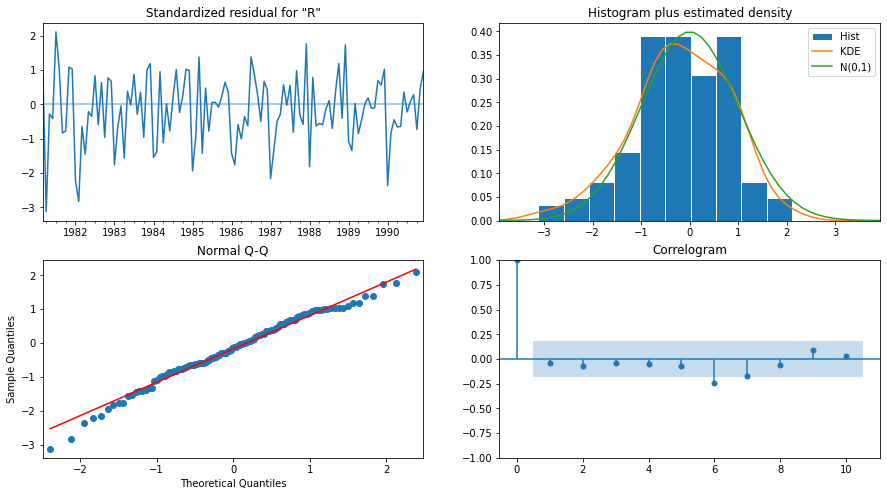

In [155]:
results_auto_SARIMA.plot_diagnostics();

In [156]:
## Predict on the Test Set using this model and evaluate the model.

In [157]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [158]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,99.923652,24.620531,51.668299,148.179006
1991-02-28,103.939011,25.581552,53.800090,154.077932
1991-03-31,92.823244,25.725826,42.401551,143.244937
1991-04-30,85.280526,25.719254,34.871714,135.689338
1991-05-31,95.582840,25.740912,45.131581,146.034100


In [159]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 38.72772381346243 
MAPE: 79.64422170429181


In [160]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(2,1,2)(2,0,2,5)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",36.812465,75.837654
"SARIMA(2,1,2)(2,0,2,5)",38.727724,79.644222


# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.


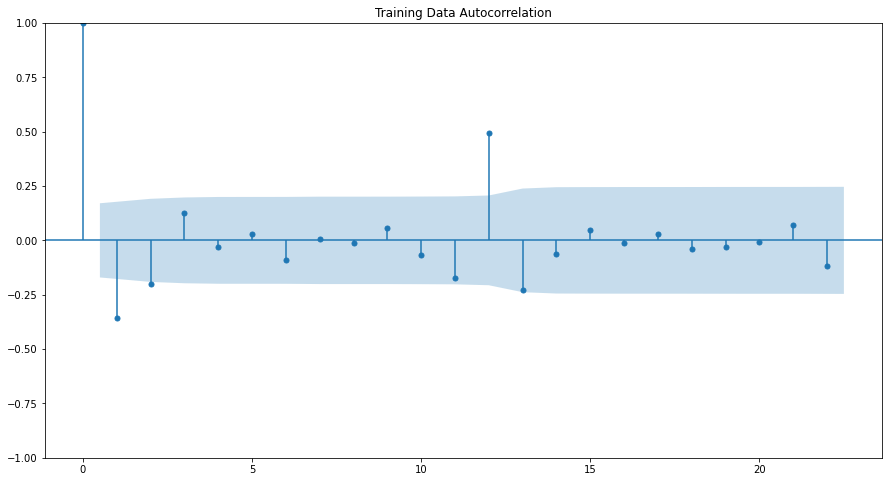

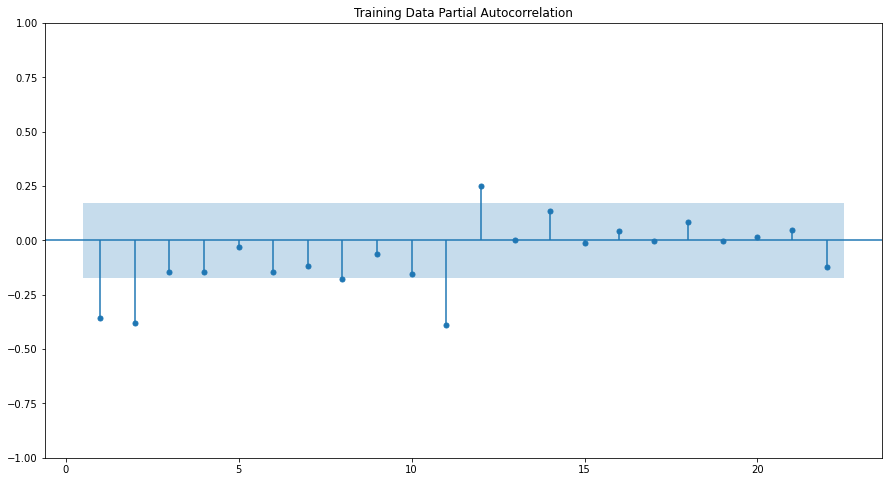

In [161]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [162]:
manual_ARIMA = ARIMA(train['Rose'], order=(4,1,4),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -632.146
Date:                Sun, 27 Nov 2022   AIC                           1282.292
Time:                        10:15:54   BIC                           1308.169
Sample:                    01-31-1980   HQIC                          1292.807
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5355      0.669     -0.801      0.423      -1.846       0.775
ar.L2         -0.8293      0.250     -3.323      0.001      -1.318      -0.340
ar.L3         -0.5475      0.652     -0.840      0.4

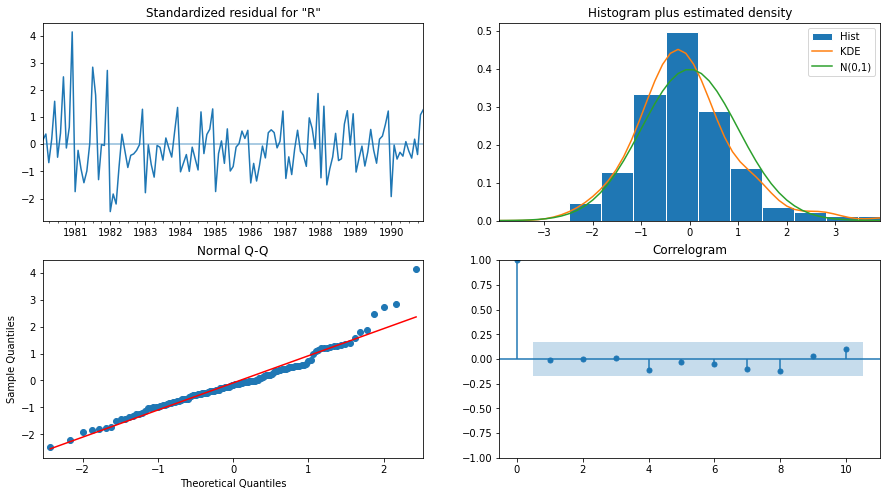

In [163]:
results_manual_ARIMA.plot_diagnostics();

In [164]:
## Predict on the Test Set using this model and evaluate the model.

In [165]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [166]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.808630051585226 
MAPE: 75.77236274328963


In [167]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",36.812465,75.837654
"SARIMA(2,1,2)(2,0,2,5)",38.727724,79.644222
"ARIMA(3,1,3)",36.808630,75.772363


In [168]:
#SARIMA

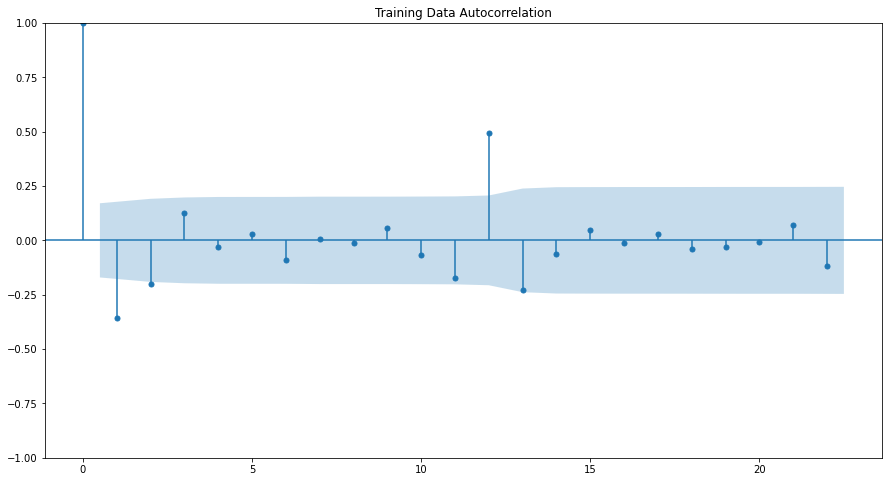

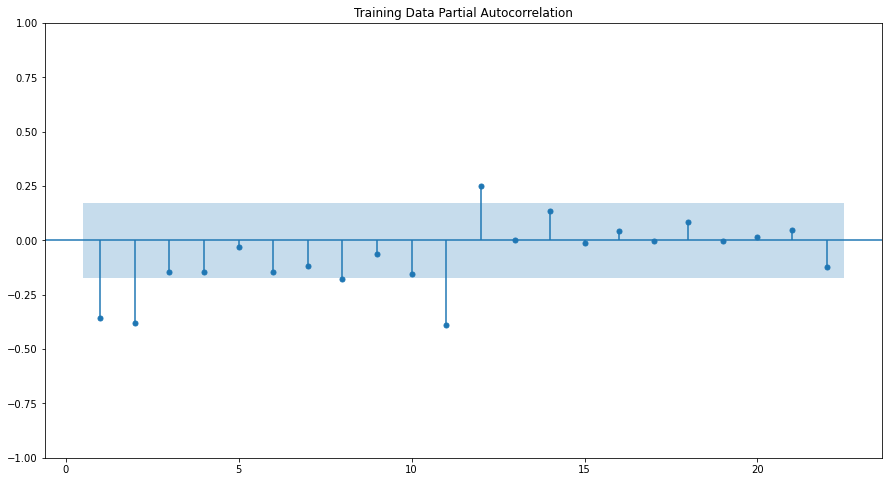

In [169]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');


In [170]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -487.076
Date:                           Sun, 27 Nov 2022   AIC                            994.152
Time:                                   10:19:25   BIC                           1021.065
Sample:                               01-31-1980   HQIC                          1005.066
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1008      0.110      0.916      0.360      -0.115       0.317
ar.L2          0.6254      0.115      5.442

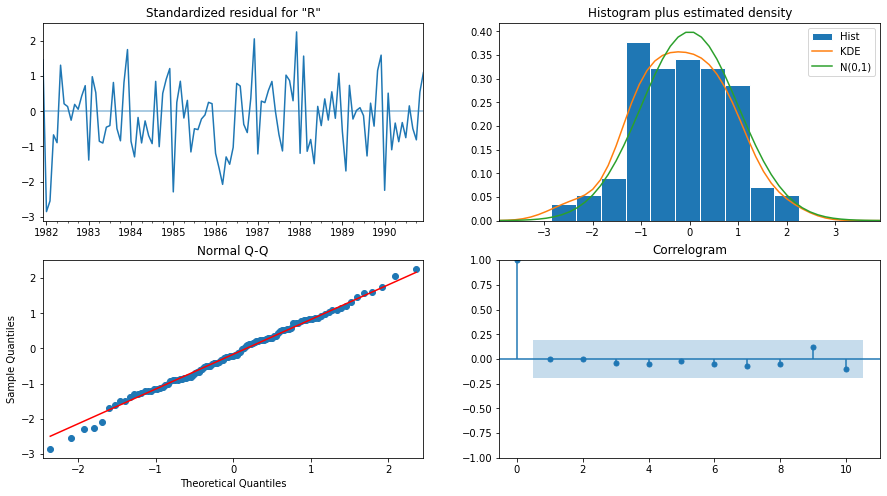

In [171]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [172]:
## Predict on the Test Set using this model and evaluate the model.

In [173]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [174]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 29.721558504612833 
MAPE: 60.37771409213758


In [175]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",36.812465,75.837654
"SARIMA(2,1,2)(2,0,2,5)",38.727724,79.644222
"ARIMA(3,1,3)",36.808630,75.772363
"SARIMA(3,1,3)(0,0,3,6)",29.721559,60.377714


# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


In [176]:
## Building the most optimum model on the Full Data.

In [177]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -734.147
Date:                           Sun, 27 Nov 2022   AIC                           1482.294
Time:                                   10:21:07   BIC                           1504.286
Sample:                               01-31-1980   HQIC                          1491.218
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7297      0.070    -10.350      0.000      -0.868      -0.592
ma.L2         -0.1899      0.066     -2.883

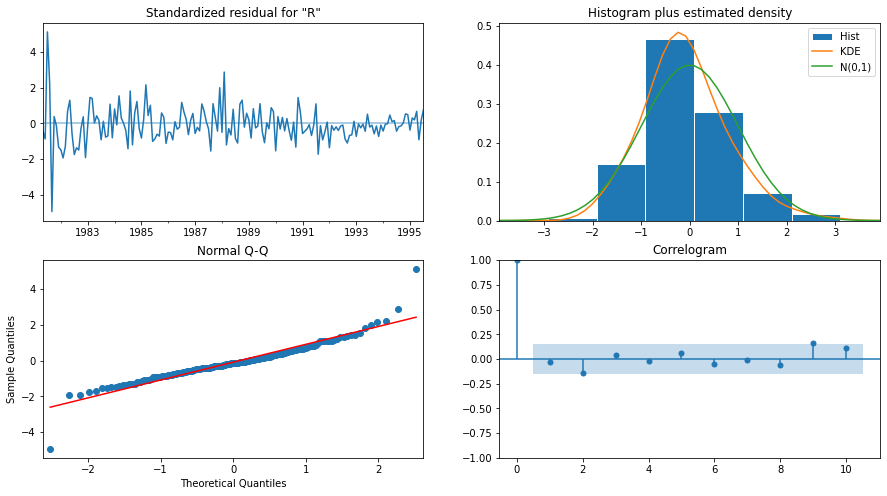

In [178]:
results_full_data_model.plot_diagnostics();

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [179]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [180]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,51.906634,16.960539,18.664589,85.148679
1995-09-30,48.560881,17.562343,14.139321,82.982441
1995-10-31,51.876502,17.615196,17.351352,86.401653
1995-11-30,52.523982,17.667891,17.895551,87.152413
1995-12-31,70.922130,17.720430,36.190725,105.653534


In [181]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 28.050812558421214


In [182]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1996-01-31',end='1996-12-31', freq='M'))

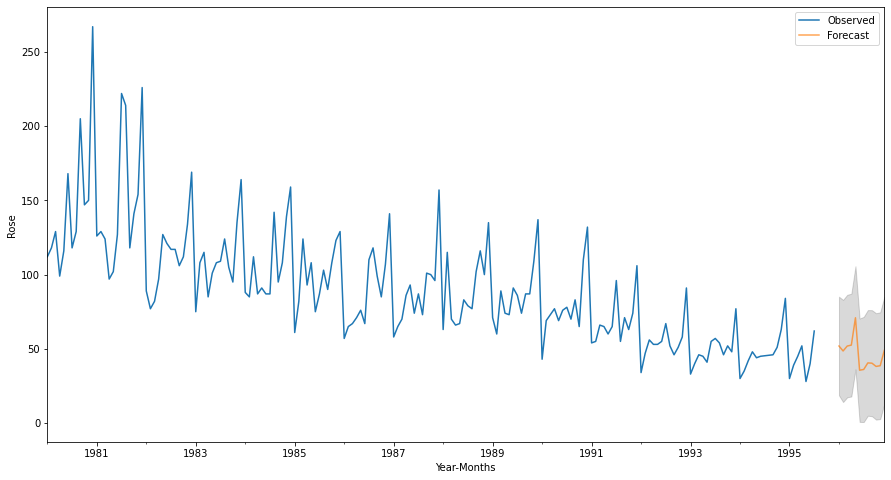

In [183]:
# plot the forecast along with the confidence band

axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [184]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,3)",36.812465,75.837654
"SARIMA(2,1,2)(2,0,2,5)",38.727724,79.644222
"ARIMA(3,1,3)",36.808630,75.772363
"SARIMA(3,1,3)(0,0,3,6)",29.721559,60.377714


# END